In [2]:
"""
Created on 24th Aug 2020
@author: Shilpa Chavan
Algorithm : Forecasting Algorithm
Dataset : PlasticSales.csv
"""
import pandas as pd
import numpy as np
%matplotlib inline
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

In [22]:
plastic = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\Forecasting\\PlasticSales.csv")
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [6]:
n = plastic['Month'][0]
n[0:3]
plastic['month']= 0

for i in range(60):
    p = plastic["Month"][i]
    plastic['month'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(plastic['month']))

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
plastic1 = pd.concat([plastic,month_dummies],axis = 1)
plastic1["t"] = np.arange(1,61)
plastic1["t_squared"] = plastic1["t"]*plastic1["t"]
plastic1.columns
plastic1["log_sales"] = np.log(plastic1["Sales"])

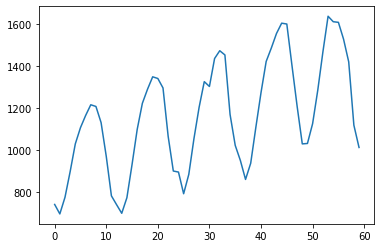

In [10]:
plastic1.Sales.plot()

In [12]:
Train = plastic1.head(50)
Test = plastic1.tail(10)

In [13]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear
#225.91579993224306

225.91579993224306

In [14]:
##################### Exponential ##############################

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp
#228.88308625341796

228.88308625341796

In [15]:
#################### Quadratic ###############################

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad
#226.49907446751172

226.49907446751172

In [16]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea
#235.49981422497947

235.49981422497947

In [17]:
################## Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 
#208.4904739882548

208.4904739882548

In [18]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea
#239.58218890662803

239.58218890662803

In [19]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea #178.97551501505967

178.97551501505967

In [20]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,225.915800
1,rmse_Exp,228.883086
2,rmse_Quad,226.499074
3,rmse_add_sea,235.499814
4,rmse_add_sea_quad,208.490474
5,rmse_Mult_sea,239.582189
6,rmse_Mult_add_sea,178.975515


In [21]:
# so rmse_add_sea has the least value among the models prepared so far 
# Predicting new values 
model_full = smf.ols('log_sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_new  = pd.Series(Mul_Add_sea.predict(Test))
pred_new1=np.exp(pred_new)
pred_new1

50    1061.452817
51    1256.558059
52    1450.010690
53    1596.679670
54    1649.807263
55    1747.515697
56    1766.807368
57    1716.235167
58    1442.176743
59    1220.845250
dtype: float64